In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



# CSV File - Read
# CSV File - Read
df = pd.read_csv('E:\\credit\\credittrain.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

print(df.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df2 = df.dropna()
df2.shape

(480, 13)

In [5]:
df2.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [6]:
df2 = df2.query('ApplicantIncome < 20000')
print(df2.shape)

(474, 13)


In [7]:
X = df2.iloc[:,[6,8]]
print(X.head())

   ApplicantIncome  LoanAmount
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
5             5417       267.0


In [8]:
df2 = pd.get_dummies(df2.drop(['Loan_ID'],axis=1) ,drop_first=True)
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1,1


In [9]:
Y = df2.iloc[:,-1] 
print(Y.head())

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status_Y, dtype: uint8


In [10]:
ktype = 'linear'  # linear, poly,sigmoid , rbf

from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel=ktype, C=1,gamma=1).fit(X, Y)

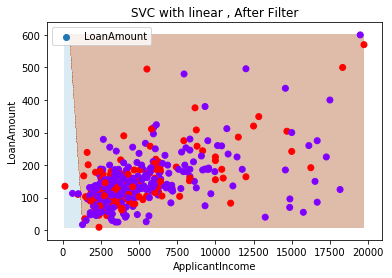

In [11]:
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100
#print(x_min, x_max, h)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)
#########################################

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
#plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.legend()
plt.show()


In [12]:
df2=df
df2 = df2.query('ApplicantIncome < 20000')
print(df2.shape)

(602, 13)
